In [31]:
import pandas as pd 
import numpy as np       
import seaborn as sns 
import matplotlib.pyplot as plt  
import warnings
warnings.filterwarnings('ignore')

In [32]:
df = pd.read_csv('bank-direct-marketing-campaigns.csv') 
print(df.shape)  
df.head()

(41188, 20)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [33]:
df2 = df.drop(columns = ['pdays','day_of_week','campaign','previous','poutcome','pdays','contact','month'],axis=1) 

columns_to_filter = ['job', 'marital', 'education', 'default', 'housing', 'loan']

# Apply filtering using a for loop
df_filtered = df2.copy()
for column in columns_to_filter:
    df_filtered = df_filtered[df_filtered[column] != 'unknown']

# Print the resulting dataframe
df3 = pd.DataFrame(df_filtered)

In [34]:
binary_encode = {'yes': 1, 'no': 0}
df3['y'] = df3['y'].map(binary_encode) 
df3['default'] = df3['default'].map(binary_encode) 
df3['housing'] = df3['housing'].map(binary_encode) 
df3['loan'] = df3['loan'].map(binary_encode)

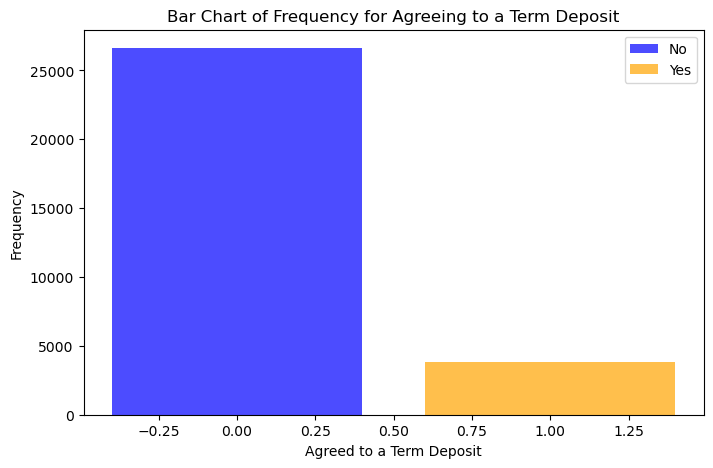

In [37]:
no_df = df3[df3['y'] == 0] 
yes_df = df3[df3['y'] ==1]


# Calculate the frequency of each category in "no" and "yes"
no_freq = no_df['y'].value_counts().sort_index()
yes_freq = yes_df['y'].value_counts().sort_index()

# Create a side-by-side bar graph
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(no_freq.index, no_freq.values, color='blue', alpha=0.7, label='No')
ax.bar(yes_freq.index, yes_freq.values, color='orange', alpha=0.7, label='Yes')
ax.set_xlabel('Agreed to a Term Deposit')
ax.set_ylabel('Frequency')
ax.set_title('Bar Chart of Frequency for Agreeing to a Term Deposit')
ax.legend()

plt.show()

In [41]:
(yes_freq.values / (no_freq.values + yes_freq.values))*100

array([12.65743899])

In [48]:
df4 = df3.copy()    
df4 = df4[df4['y']== 1]

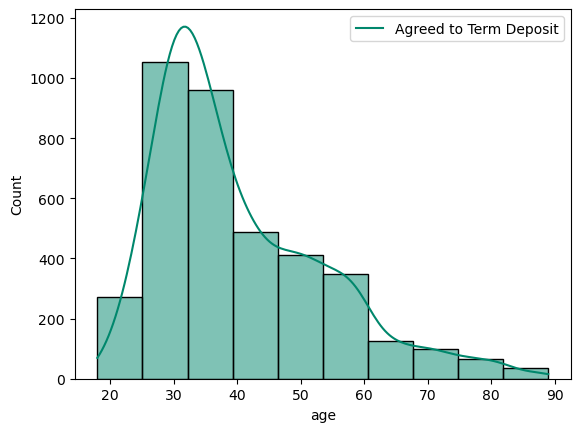

In [53]:
ax = sns.histplot(data=df4, x='age', bins=10,kde=True, hue='y', 
             multiple='layer', element='bars', palette=['#00876c','#d43d51']) 

ax.legend(['Agreed to Term Deposit'])
plt.show()

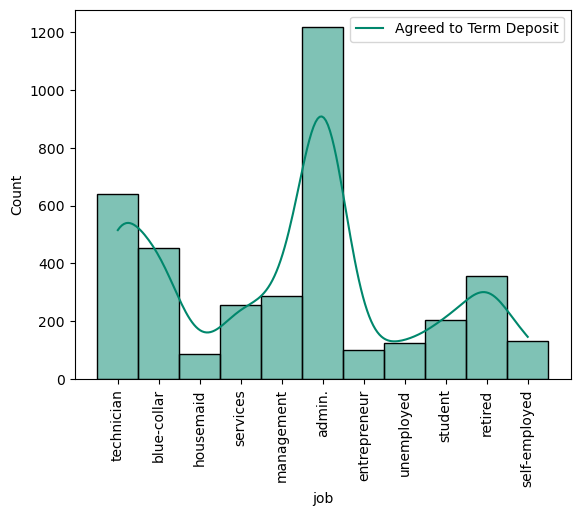

In [56]:
ax = sns.histplot(data=df4, x='job',kde=True, hue='y', 
             multiple='layer', element='bars',palette=['#00876c','#d43d51'])    
ax.legend(['Agreed to Term Deposit'])
plt.xticks(rotation=90) 
plt.show()

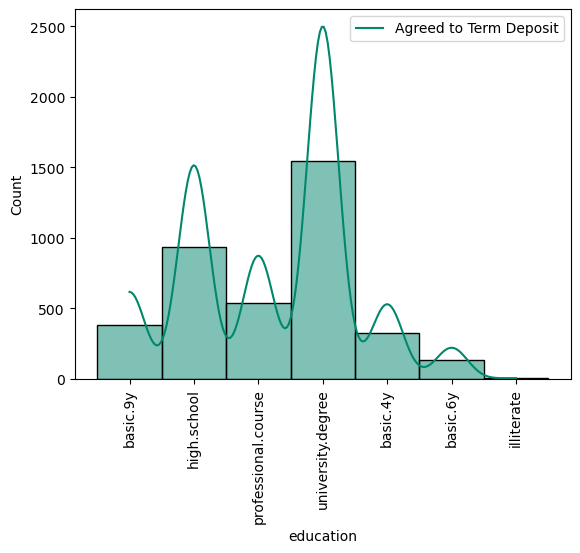

In [57]:
ax = sns.histplot(data=df4, x='education',kde=True, hue='y', 
             multiple='layer', element='bars',palette=['#00876c','#d43d51'])  
ax.legend(['Agreed to Term Deposit'])
plt.xticks(rotation=90) 
plt.show()

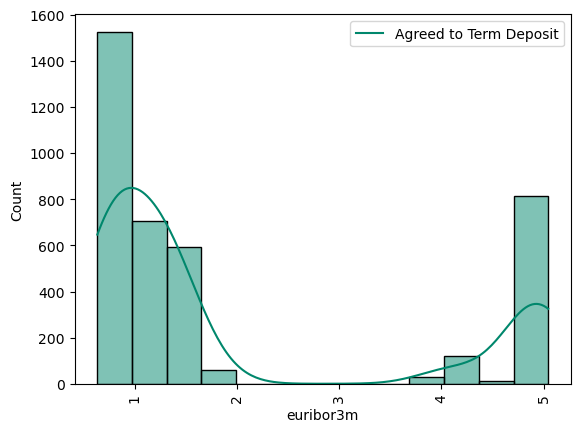

In [59]:
ax = sns.histplot(data=df4, x='euribor3m',kde=True, hue='y', 
             multiple='layer', element='bars',palette=['#00876c','#d43d51'])  
ax.legend(['Agreed to Term Deposit'])
plt.xticks(rotation=90) 
plt.show()

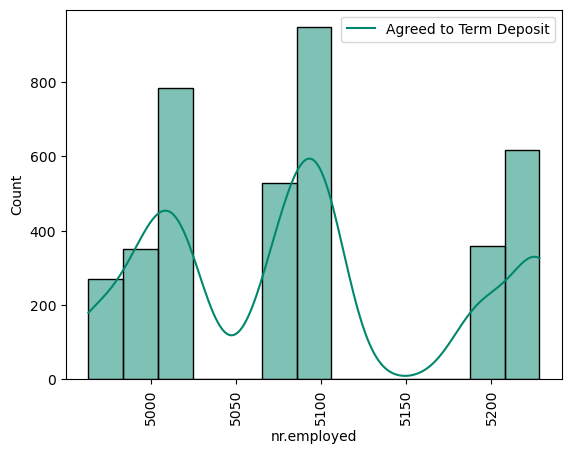

In [60]:
ax = sns.histplot(data=df4, x='nr.employed',kde=True, hue='y', 
             multiple='layer', element='bars',palette=['#00876c','#d43d51'])  
ax.legend(['Agreed to Term Deposit'])
plt.xticks(rotation=90) 
plt.show()